In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('/workspaces/codespaces-jupyter/data/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
diabetes.shape

(768, 9)

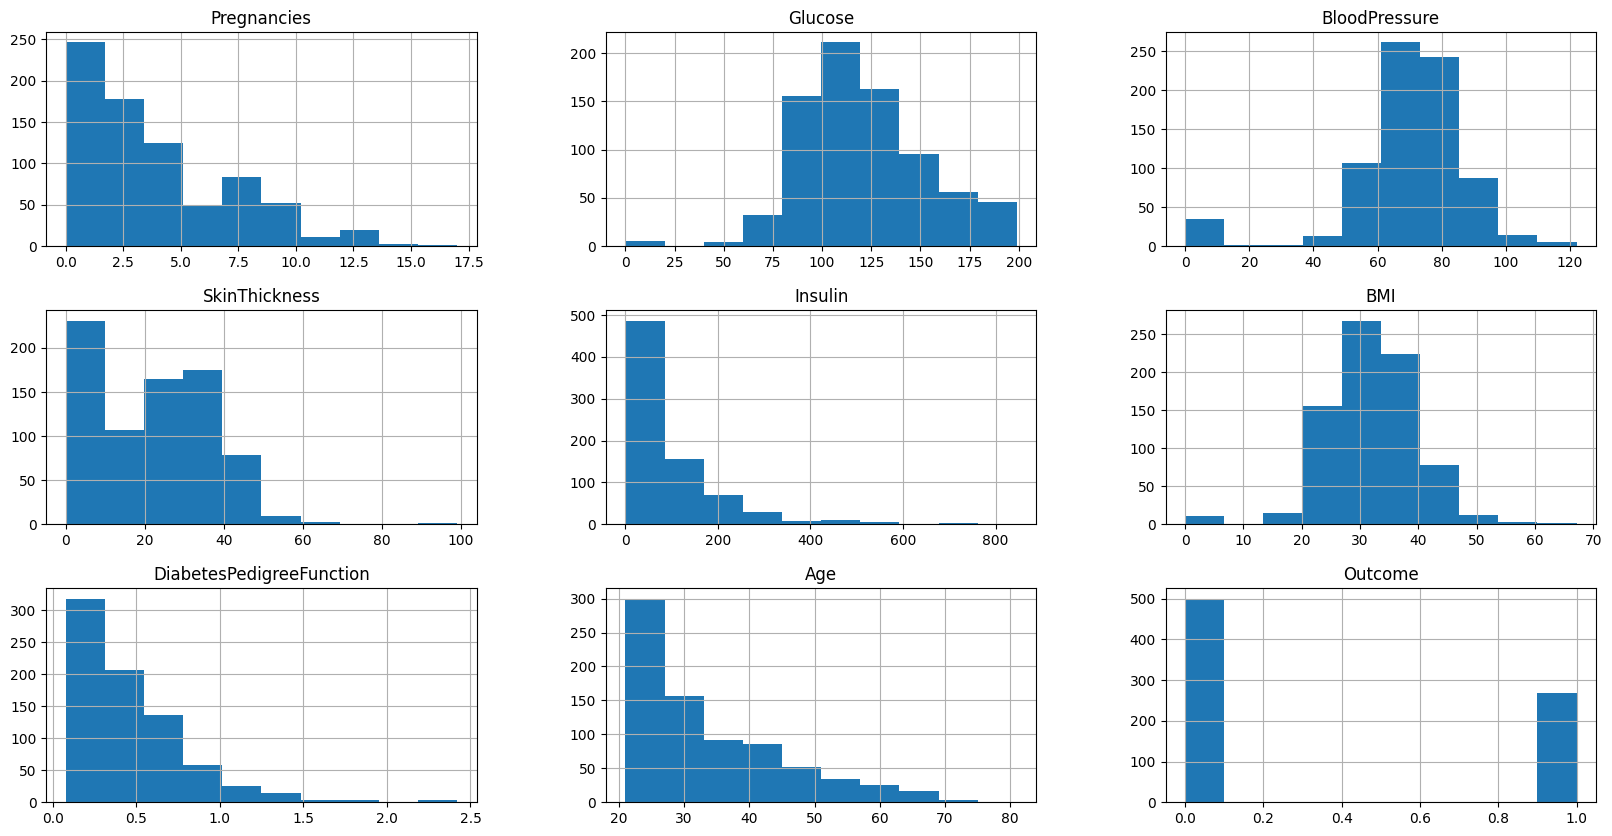

In [4]:
diabetes.hist(figsize=(20,10)); ## this handling benefits for approaching subplots with minimal code 

In [4]:
diabete_counts = diabetes.Outcome.value_counts()

In [4]:
diabete_counts

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
print('Class 0',diabete_counts[0])
print('Class 1',diabete_counts[1])
print('Propotion',round(diabete_counts[0]/diabete_counts[1],2),':1')

Class 0 500
Class 1 268
Propotion 1.87 :1


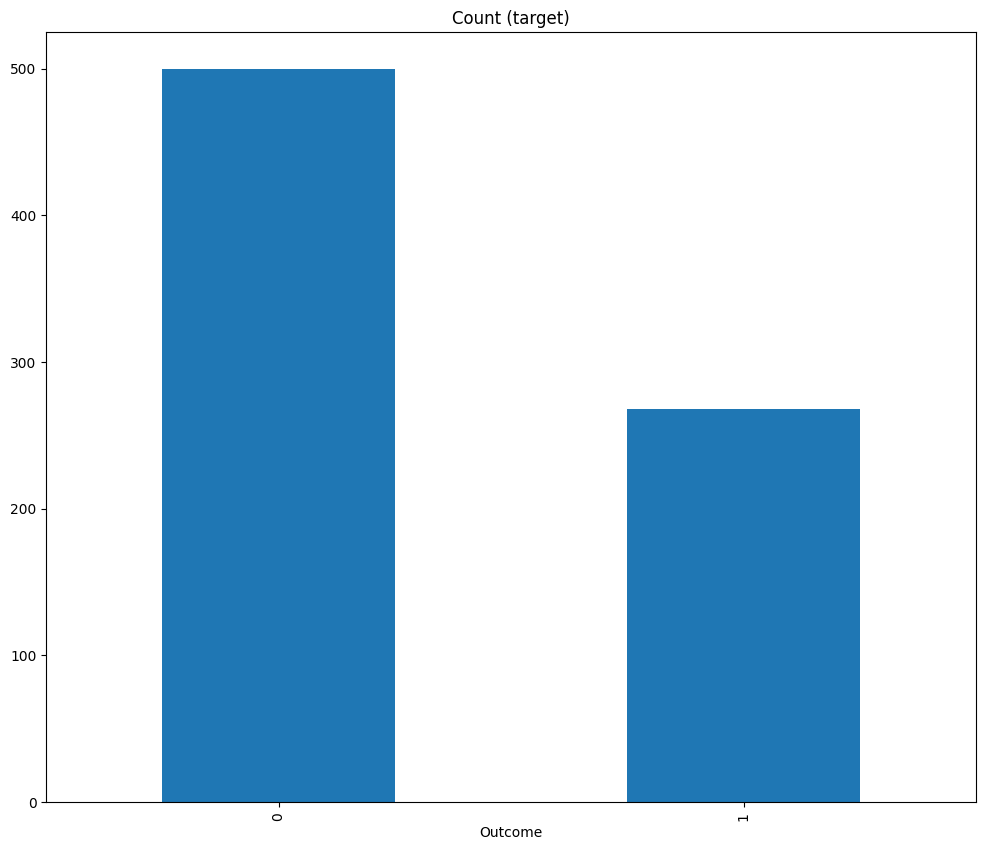

In [7]:
diabete_counts.plot(kind='bar',title='Count (target)',figsize=(12,10));

In [6]:
y = diabetes.Outcome
x = diabetes.drop('Outcome',axis=1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=27)

In [8]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')

In [9]:
logistic_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [10]:
y_pred = logistic_model.predict(x_test)

In [11]:
pd.crosstab(y_pred,y_test)

Outcome,0,1
row_0,,
0,111,31
1,19,31


# outcome(0 negative) and predict (0 negative)=> 111 (non-diabetes)
# outcome(1 pos) and predict(0 negative) => 31 (have diabetes but predict shows no)
# outcome(0 neg) and predcit (1 postive) => 19 (should be non-diabetes but predicts diabetes)
# outcomes(1 pos) and predict(1 pos) => 31 (outcome yes and predict yes)
#This confusion matrix provides a comprehensive view of the logistic regression model's performance in predicting diabetes. While the accuracy is reasonably high at approximately 74%, the model has a lower recall (50%), indicating it misses a significant number of actual positive cases. Precision is at 62%, showing that when the model predicts diabetes, it's correct 62% of the time. The specificity is higher, suggesting the model is better at identifying non-diabetic patients correctly.


In [12]:
from sklearn import metrics

In [13]:
metrics.accuracy_score(y_test,y_pred) # Measures overall correctness

0.7395833333333334

In [14]:
metrics.precision_score(y_test,y_pred) # Focuses on the correctness of positive predictions.

np.float64(0.62)

In [15]:
metrics.recall_score(y_test,y_pred) #Measures the ability to find all relevant positive instances

np.float64(0.5)

In [16]:
x = pd.concat([x_train,y_train],axis=1)

In [17]:
x = x.reset_index(drop=True)

In [18]:
non_diabetes = diabetes[diabetes.Outcome==0]
diabetic = diabetes[diabetes.Outcome==1]

In [3]:
from sklearn.utils import resample

In [20]:
over_sampled = resample(diabetic,replace=True,n_samples=len(non_diabetes),random_state=27)

In [21]:
over_sampled = pd.concat([non_diabetes,over_sampled])

In [22]:
over_sampled.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
995,0,140,65,26,130,42.6,0.431,24,1
996,4,184,78,39,277,37.0,0.264,31,1
997,2,155,74,17,96,26.6,0.433,27,1
998,0,119,0,0,0,32.4,0.141,24,1


In [27]:
over_sampled.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
644,3,103,72,30,152,27.6,0.730,27,0
334,1,95,60,18,58,23.9,0.260,22,0
563,6,99,60,19,54,26.9,0.497,32,0
693,7,129,68,49,125,38.5,0.439,43,1
355,9,165,88,0,0,30.4,0.302,49,1


In [29]:
outcome_count = over_sampled.Outcome.value_counts()

In [32]:
print('Class 0',outcome_count[0])
print('Class 1',outcome_count[1])
print('Propotion',round(outcome_count[0]/outcome_count[1],2),':1')

Class 0 500
Class 1 500
Propotion 1.0 :1


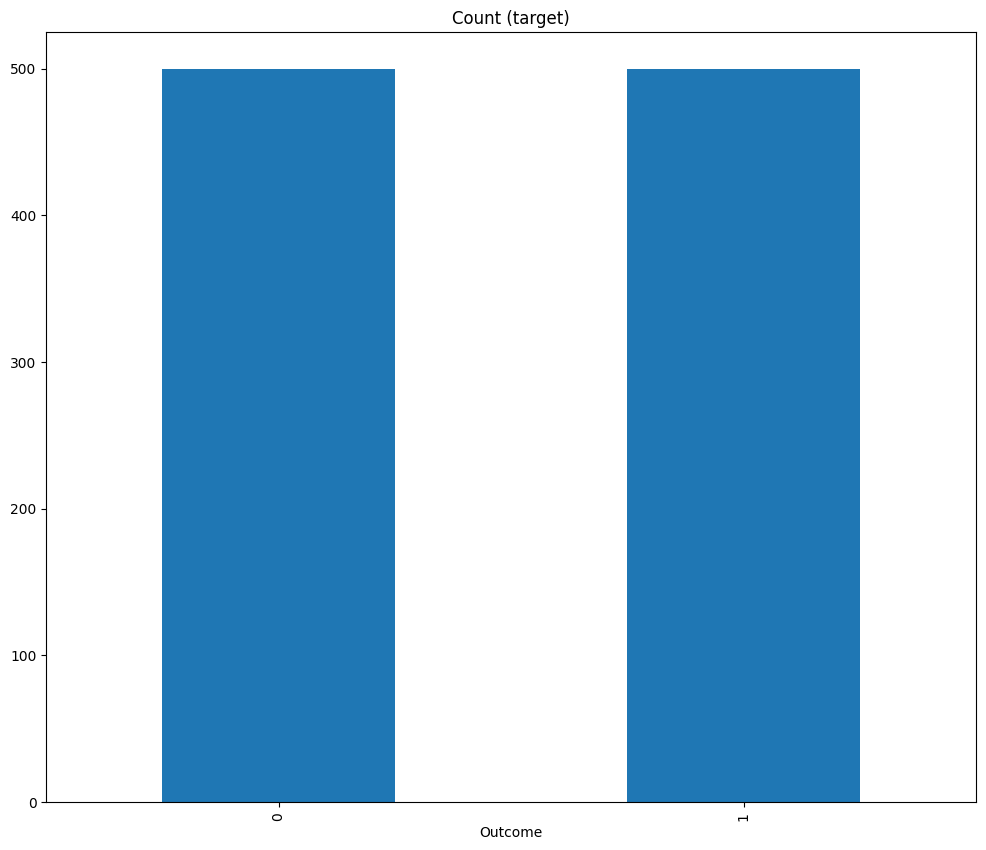

In [33]:
outcome_count.plot(kind='bar',title='Count (target)',figsize=(12,10));

In [23]:
y_train = over_sampled.Outcome
x_train = over_sampled.drop('Outcome',axis=1)

In [24]:
logistic_model = LogisticRegression(solver='liblinear')

In [25]:
logistic_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [26]:
y_pred = logistic_model.predict(x_test)

In [27]:
pd.crosstab(y_pred,y_test)

Outcome,0,1
row_0,,
0,99,17
1,31,45


In [28]:
metrics.accuracy_score(y_test,y_pred)

0.75

In [29]:
metrics.precision_score(y_test,y_pred)

np.float64(0.5921052631578947)

In [30]:
metrics.recall_score(y_test,y_pred)

np.float64(0.7258064516129032)

In [ ]:
# accuracy should be over 95%
# recall should be over 80%
# precision should be over 80%

In [13]:
#Undersampling 

In [14]:
df_majority = diabetes[diabetes['Outcome']==0]
df_minority = diabetes[diabetes['Outcome']==1]

In [15]:
df_minority

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [17]:
df_undersampled_majority = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [18]:
df_undersampled = pd.concat([df_undersampled_majority,df_minority])

In [19]:
df_undersampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
556,1,97,70,40,0,38.1,0.218,30,0
117,5,78,48,0,0,33.7,0.654,25,0
572,3,111,58,31,44,29.5,0.430,22,0
251,2,129,84,0,0,28.0,0.284,27,0
161,7,102,74,40,105,37.2,0.204,45,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [20]:
df_undersampled_count = df_undersampled.Outcome.value_counts()
df_undersampled_count

Outcome
0    268
1    268
Name: count, dtype: int64

In [23]:
print('Class 0',df_undersampled_count[0])
print('Class 1',df_undersampled_count[1])
print('Propotion',round(df_undersampled_count[0]/df_undersampled_count[1],2),': 1')

Class 0 268
Class 1 268
Propotion 1.0 : 1


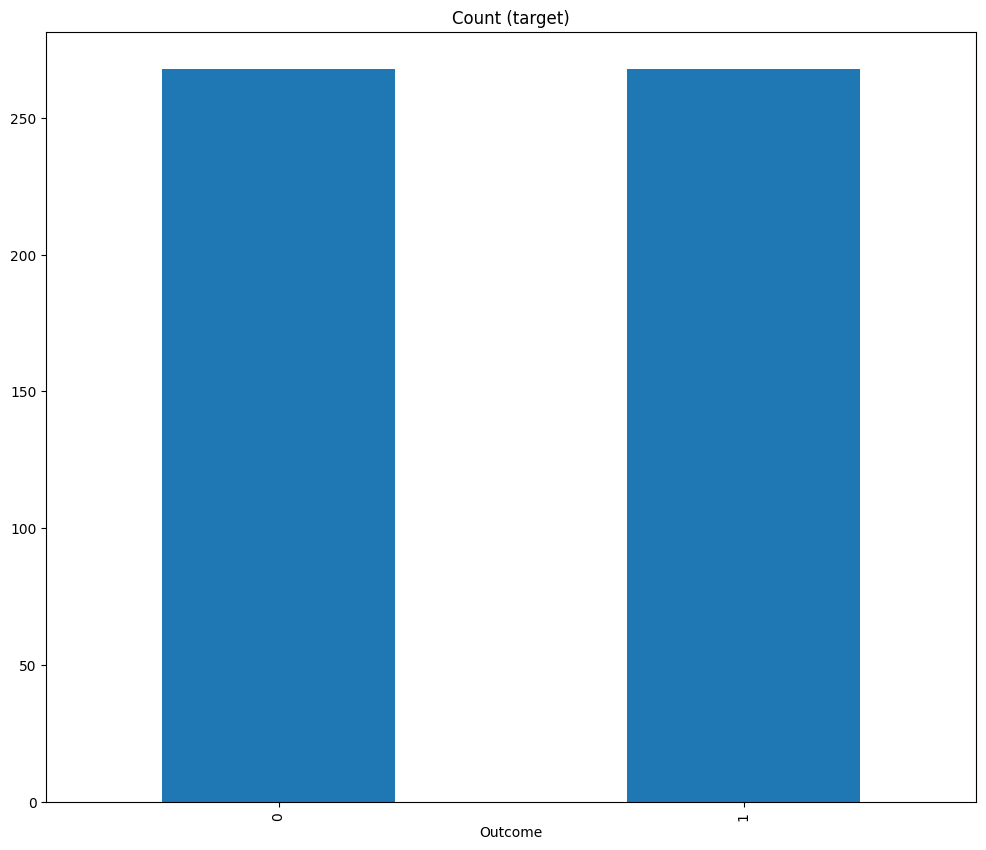

In [24]:
df_undersampled_count.plot(kind='bar',title='Count (target)',figsize=(12,10));

In [ ]:
## comparing key difference of oversampling and undersampling
1.undersampling reduce the size of data
2.oversampling needs more stroage and it is necessary to provide massive stroage due to its duplicated data